In [1]:
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
def MakeData(Name, colsize):#(읽을 Bench name, column 수)
    tmp = pd.read_csv(("Log/nofan/"+str(Name)+".csv"), sep=";", header=1, na_filter=False)
    tmp = tmp.drop(columns=["Unnamed: 205","Date","C2res%","C3res%.1","C6res%.1","C7res%.1","C8res%","C9res%","C10res%"])
    tmp = tmp.drop(columns=["EXEC","IPC","L3MISS","L2MISS","L3HIT","L2HIT","L3MPI","L2MPI","READ","WRITE","INST","ACYC","TIME(ticks)","PhysIPC","PhysIPC%","INSTnom","INSTnom%","C0res%","C1res%","C3res%","C6res%","C7res%","Proc_Energy_(Joules)"])
    tmp = tmp.drop(columns=["EXEC.1","IPC.1","FREQ.1","AFREQ.1","L3MISS.1","L2MISS.1","L3HIT.1","L2HIT.1","L2MPI.1","L3MPI.1","READ.1","WRITE.1"])
    tmp = tmp.iloc[:,1:colsize+2] 
    for i in range(0,tmp.index.size):
        tmp.iloc[i,colsize] = 100 - tmp.iloc[i,colsize]  
    return tmp

In [3]:
def insert_after(counts, Data, Temp_colnum): # (위로 올릴 row 수, Data, temp 있는 column 번호)
    temp = []
    for i in range (0,Data.index.size-counts):
        temp.append(Data.iloc[i+counts,Temp_colnum])
    for i in range (Data.index.size-counts,Data.index.size):
        temp.append(Data.iloc[i,Temp_colnum])
    Data["temp_A"] = temp
    return Data

In [4]:
benchlist = ["astar","calculix","gamess","gcc","gobmk","mcf","povray","soplex","sphinx3","tonto","wrf"]
datalist = []
colsize = {"System":3}#26 읽어오면 System 전체 정보
All = pd.DataFrame()
for bench in benchlist:
    datalist.append(insert_after(10, MakeData(bench, colsize["System"]), -1))
All = pd.concat(datalist, axis=0)

In [8]:
All.head()

,FREQ,AFREQ,Total_Util,TEMP,temp_A
0,0.0117,0.222,0.549,61,61
1,0.0252,0.222,0.000,61,61
2,0.0212,0.222,0.125,61,61
3,0.0126,0.222,0.000,60,61
4,0.0131,0.222,0.000,61,61


In [9]:
datalist[0]

,FREQ,AFREQ,Total_Util,TEMP,temp_A
0,0.0117,0.222,0.5490,61,61
1,0.0252,0.222,0.0000,61,61
2,0.0212,0.222,0.1250,61,61
3,0.0126,0.222,0.0000,60,61
4,0.0131,0.222,0.0000,61,61
5,0.0129,0.222,0.1540,61,61
6,0.0130,0.222,0.0000,61,61
7,0.0131,0.222,0.0833,60,60
8,0.0132,0.222,0.0000,60,61
9,0.0133,0.222,0.0000,61,61


In [32]:
lr = LinearRegression()
lr.fit(All.iloc[:,1:2], All.iloc[:,4])#26->temp, 27-> temp_A

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

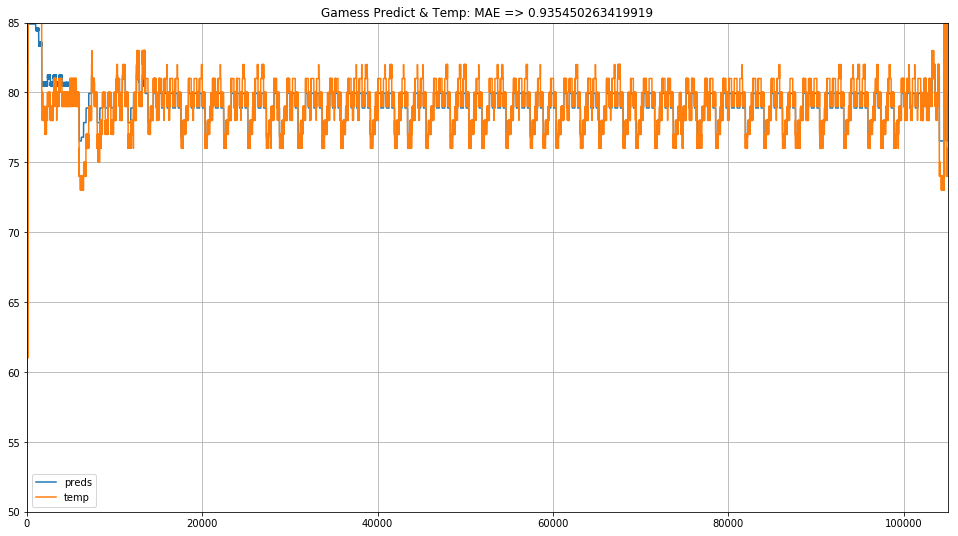

In [26]:
import matplotlib.pyplot as plt
testnum = 2 # range 0-10
testdata = datalist[testnum]
predicted = lr.predict(testdata.iloc[:,1:2])
resultData = pd.DataFrame(predicted, columns = ['preds'])
resultData['temp'] = testdata.iloc[:,4]
resultData.plot(figsize=(16.5,9), grid = 1, title= str((benchlist[testnum]).capitalize()) +" Predict & Temp: MAE => " + str(mean_absolute_error(predicted, testdata.iloc[:,4])), ylim=[50,85], xlim=[0,resultData.index.size])
plt.show()